In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jakeshbohaju/brain-tumor")

print("Path to dataset files:", path)

100%|██████████| 14.0M/14.0M [00:00<00:00, 15.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tqdm import tqdm

In [ ]:
df1 = pd.read_csv("/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Brain Tumor.csv")

In [ ]:
df1.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [ ]:
df2 = pd.read_csv("/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/bt_dataset_t3.csv")

In [ ]:
df2.head()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,Image1,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.458341e-155,97.974630,0.777011,0.171163,0.303989,1
1,Image2,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.458341e-155,110.346597,0.977953,0.009913,0.839019,1
2,Image3,3.244263,642.059166,25.338886,0.966065,7.772860,61.756034,81.752406,0.980161,0.960715,0.985066,0.540411,0.944259,7.458341e-155,112.266298,0.985362,0.006372,0.849775,1
3,Image4,8.511353,1126.214187,33.559115,0.868765,3.763142,15.107579,362.291213,0.921786,0.849690,0.949295,2.765725,0.859027,7.458341e-155,101.955792,0.881015,0.068437,0.000000,0
4,Image5,21.000793,2235.316978,47.279139,0.684724,1.936029,4.722343,312.439226,0.804184,0.646711,0.880301,3.006660,0.938572,7.458341e-155,97.639870,0.766308,0.184878,0.000000,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               1644 non-null   object 
 1   Mean                1644 non-null   float64
 2   Variance            1644 non-null   float64
 3   Standard Deviation  1644 non-null   float64
 4   Entropy             1644 non-null   float64
 5   Skewness            1275 non-null   float64
 6   Kurtosis            1275 non-null   float64
 7   Contrast            1644 non-null   float64
 8   Energy              1644 non-null   float64
 9   ASM                 1644 non-null   float64
 10  Homogeneity         1644 non-null   float64
 11  Dissimilarity       1644 non-null   float64
 12  Correlation         1644 non-null   float64
 13  Coarseness          1644 non-null   float64
 14  PSNR                1644 non-null   float64
 15  SSIM                1275 non-null   float64
 16  MSE   

In [ ]:
df1.isnull().sum()

,0
Image,0
Class,0
Mean,0
Variance,0
Standard Deviation,0
Entropy,0
Skewness,0
Kurtosis,0
Contrast,0
Energy,0


In [ ]:
df2.isnull().sum()

,0
Image,0
Mean,0
Variance,0
Standard Deviation,0
Entropy,0
Skewness,369
Kurtosis,369
Contrast,0
Energy,0
ASM,0


In [ ]:
df2['Skewness'].fillna(df2['Skewness'].mean(), inplace=True)
df2['Kurtosis'].fillna(df2['Kurtosis'].mean(), inplace=True)
df2['SSIM'].fillna(df2['SSIM'].mean(), inplace=True)
df2['DC'].fillna(df2['DC'].mean(), inplace=True)

<ipython-input-24-7992820be563>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Skewness'].fillna(df2['Skewness'].mean(), inplace=True)
<ipython-input-24-7992820be563>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
merged_df = pd.merge(df1, df2, on='Image', how='inner')

In [ ]:
merged_df.columns

Index(['Image', 'Class', 'Mean_x', 'Variance_x', 'Standard Deviation_x',
       'Entropy_x', 'Skewness_x', 'Kurtosis_x', 'Contrast_x', 'Energy_x',
       'ASM_x', 'Homogeneity_x', 'Dissimilarity_x', 'Correlation_x',
       'Coarseness_x', 'Mean_y', 'Variance_y', 'Standard Deviation_y',
       'Entropy_y', 'Skewness_y', 'Kurtosis_y', 'Contrast_y', 'Energy_y',
       'ASM_y', 'Homogeneity_y', 'Dissimilarity_y', 'Correlation_y',
       'Coarseness_y', 'PSNR', 'SSIM', 'MSE', 'DC', 'Target'],
      dtype='object')

In [ ]:
features = ['Mean_x', 'Variance_x', 'Standard Deviation_x', 'Entropy_x',
            'Skewness_x', 'Kurtosis_x', 'Contrast_x', 'Energy_x', 'ASM_x',
            'Homogeneity_x', 'Dissimilarity_x', 'Correlation_x', 'Coarseness_x',
            'PSNR', 'SSIM', 'MSE', 'DC']

In [ ]:
X = merged_df[features]
y = merged_df['Target']

In [ ]:
print("Class Distribution:\n", y.value_counts())

Class Distribution:
 Target
1    1449
0     195
Name: count, dtype: int64


In [ ]:
image_folder = "/root/.cache/kagglehub/datasets/jakeshbohaju/brain-tumor/versions/3/Brain Tumor/Brain Tumor"

In [ ]:
os.chdir(image_folder)

In [ ]:
image_files = os.listdir(image_folder)  # لیست فایل‌های موجود در پوشه

print(f"Total files in folder: {len(image_files)}")
print(f"Example files: {image_files[:5]}")

Total files in folder: 3762
Example files: ['Image1863.jpg', 'Image730.jpg', 'Image3655.jpg', 'Image2982.jpg', 'Image3711.jpg']


Missing files: 1644
Example missing files: ['Image1', 'Image2', 'Image3', 'Image4', 'Image5']


In [ ]:
merged_df['Image_Path'] = merged_df['Image'].apply(lambda x: os.path.join(image_folder, x))

In [ ]:
merged_df['Image_Path'] = merged_df['Image_Path'] + '.jpg'

In [ ]:
df_files = merged_df['Image_Path'].apply(os.path.basename)  # فقط نام فایل بدون مسیر
image_files = os.listdir(image_folder)  # تمام فایل‌های موجود در پوشه

# پیدا کردن فایل‌هایی که در دیتافریم هستند اما در پوشه نیستند
missing_files = [f for f in df_files if f not in image_files]

if missing_files:
    print(f"Missing files: {len(missing_files)}")
    print(f"Example missing files: {missing_files[:5]}")
else:
    print("All dataset files are present in the folder.")


All dataset files are present in the folder.


In [ ]:
print(merged_df[['Image', 'Image_Path', 'Target']].head())

    Image                                         Image_Path  Target
0  Image1  /root/.cache/kagglehub/datasets/jakeshbohaju/b...       1
1  Image2  /root/.cache/kagglehub/datasets/jakeshbohaju/b...       1
2  Image3  /root/.cache/kagglehub/datasets/jakeshbohaju/b...       1
3  Image4  /root/.cache/kagglehub/datasets/jakeshbohaju/b...       0
4  Image5  /root/.cache/kagglehub/datasets/jakeshbohaju/b...       0


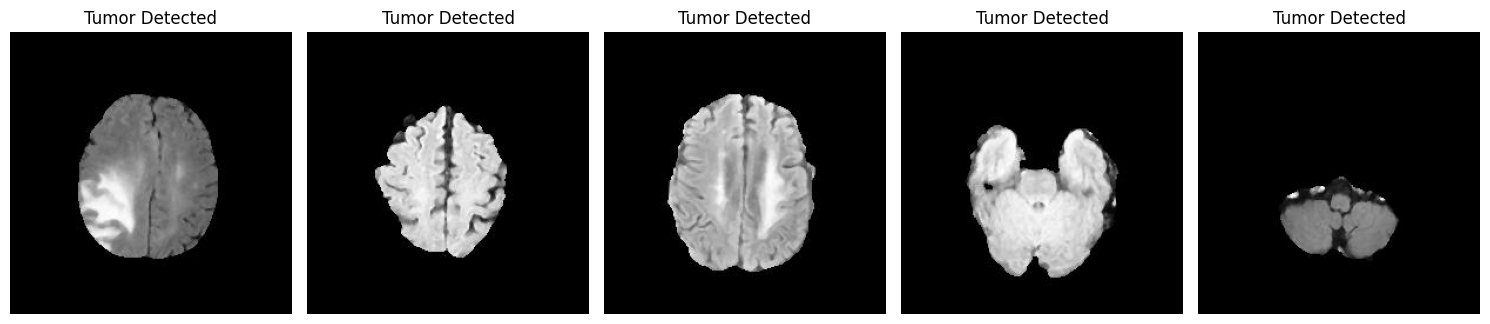

In [ ]:
tumor_images = merged_df[merged_df['Target'] == 1]
sample_images = tumor_images['Image_Path'].sample(5)

plt.figure(figsize=(15, 10))
for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title("Tumor Detected")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def preprocess_image(image_path, size=(128, 128)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, size)
    img = img / 255.0  # نرمال‌سازی
    return img

In [ ]:
X_images = np.array([preprocess_image(img_path) for img_path in merged_df['Image_Path']])
y_labels = merged_df['Target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_images, y_labels, test_size=0.2, random_state=42, stratify=y_labels)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # خروجی باینری
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 863ms/step - accuracy: 0.9743 - loss: 0.0626 - val_accuracy: 0.8517 - val_loss: 1.0542
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 867ms/step - accuracy: 0.9801 - loss: 0.0509 - val_accuracy: 0.8023 - val_loss: 0.9000
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 870ms/step - accuracy: 0.9687 - loss: 0.0731 - val_accuracy: 0.8175 - val_loss: 0.8243
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 856ms/step - accuracy: 0.9807 - loss: 0.0604 - val_accuracy: 0.8403 - val_loss: 1.0806
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 867ms/step - accuracy: 0.9884 - loss: 0.0408 - val_accuracy: 0.8403 - val_loss: 1.0129
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 863ms/step - accuracy: 0.9787 - loss: 0.0444 - val_accuracy: 0.8441 - val_loss: 1.2126
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 871ms/step - accuracy: 0.9739 - loss: 0.0533 - val_accuracy: 0.8327 - val_loss: 1.1464
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 862ms/step - accuracy: 0.9819 - loss: 0.0490 - val_accu

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - accuracy: 0.8597 - loss: 1.1673
Test Accuracy: 86.93%
